In [91]:
import requests
from IPython.core.display import HTML


# Clustering
This exercise involves working with K-means clustering, _Mean-shift clustering_, and _Agglomerative clustering_ on the poses data used for the exercises in week 2
 and week 10
. The task includes applying and experimenting with each method and then comparing their outcomes. The comparison will be conducted by clustering a sequence of human poses using these three methods in similar steps.
The dataset tensor contains 1403 pose sequences. Each sequence is a 100-frames time series capturing human poses. Each pose consists of 25 skeletal joints, where each joint is defined by an x and y coordinate ($25*2$). The shape of the dataset tensor is $(1403, 100, 25*2)$. For this exercise, you will use a single pose sequence of 100 frames and apply clustering to the sequence.
## Task overview
For each clustering method you will:
- Implement the method.
- Plot the clusters in the sequence.
- Plot the cluster centers.


<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#loading00">Task 1: Introduction</a>
            </li>
            <li>
            <a href="#loading_files">Task 2: Setting up the data</a>
            </li>
            <li>
            <a href="#loading">Task 3: Fitting the algorithm</a>
            </li>
            <li>
            <a href="#loading2">Task 4: K-means clustering visualization</a>
            </li>
            <li>
            <a href="#loading02">Task 5: Cluster characteristics</a>
            </li>
            <li>
            <a href="#loading3">Task 6: Elbow Method</a>
            </li>
            <li>
            <a href="#loading4">Task 7: Fitting the mean-shift algorithm</a>
            </li>
            <li>
            <a href="#loading5">Task 8: Visualizing clusters</a>
            </li>
            <li>
            <a href="#loading9">Task 9: Reflection and the bandwith parameter</a>
            </li>
            <li>
            <a href="#loading10">Task 10: Dendrograms</a>
            </li>
            <li>
            <a href="#loading11">Task 11: Fitting the agglomerative clustering alg…</a>
            </li>
            <li>
            <a href="#loading12">Task 12: Agglomerative clustreing algorithm mean …</a>
            </li>
            <li>
            <a href="#loading13">Task 13: Compare and reflect on the methods</a>
            </li>
        </ul>
    </div>
</article>


---
**Task 1 (easy): Introduction💡**
This task is about understanding the data.
1. Explain the benefits of applying a clustering method to a sequence of pose data.
2. Identify possible pitfalls.


---

## Task 1 reflection

**Explain the benefits of applying a clustering method to a sequence of pose data.**

* Label Generation: Since it is an unsupervised learning technique we can create labels for unlabeled data.


* Pattern Discovery: Grouping poses together can sometimes identify patterns that can be used to predict the movements on a person based on the previous posture. For example, clustering might reveal distinct postures or transitions in dance moves or sports.
Ex. American football, to determine if player is about to run left or right.

* Data Reduction: By grouping similar poses, clustering can reduce the complexity of the data, making it easier to analyze and interpret. Instead of handling each pose frame individually, groups of similar poses can represent overall trends.

* Anomaly Detection: Clustering can help identify outliers, which may represent unusual or abnormal poses, potentially useful in security, health monitoring, or sports applications.


**Identify possible pitfalls.**

* High-dimensional spaces often make clustering difficult, as distance metrics may become less meaningful, and noise can lead to misleading clusters.

* Temporal Dependencies: Clustering typically doesn’t account for the order of data points, but pose data often has a temporal structure (i.e., each pose depends on previous ones). Ignoring this may result in clusters that don't respect the natural transitions between poses.

* Overlapping Clusters: Poses that look similar in isolation might belong to different activities (e.g., sitting vs. crouching). Clustering without careful feature selection can lead to overlapping clusters, reducing the interpretability of the results.

* Choice of Distance Metric and Algorithm: The clustering result can vary significantly depending on the algorithm and distance metric. A poor choice can lead to clusters that do not align with meaningful pose groupings.


The following cells import libraries and provide functions for plotting the poses:


In [92]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from clustering_utils import *


# Suppress the specific warning
warnings.filterwarnings("ignore")


---
**Task 2 (easy): Setting up the data👩‍💻**
1. Run the cell below to load and reshape the dataset, and extract a single pose sequence of 100 frames. 
2. Choose the 100th pose sequence as the dataset.


---

In [93]:
data = np.load('poses_norm.npy')
N,T,D,C = data.shape
reshaped_data = data.reshape(N,T,D*C)
sequence = reshaped_data[99]
print(sequence.shape)

(100, 50)


## K-means Clustering
In this  exercise you will use k-means clustering on a pose sequence. 

---
**Task 3 (easy): Fitting the algorithm👩‍💻**
1. Run the cell below to create an instance of the `KMeans`
 class with 3 clusters and to find clusters in the sequence.


---

In [94]:
# Specify the number of clusters (k)
k = 8  

# Create KMeans 
kmeans = KMeans(n_clusters=k, random_state=84)

# Fit to the data
kmeans.fit(sequence)

KMeans(random_state=84)


---
**Task 4 (easy): K-means clustering visualization👩‍💻**
1. Use the [documentation on the `labels_`
 attribute.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
 to obtain cluster labels. 
2. Use the `plot_single_pose`
 function to color each pose in the pose sequence according to which cluster it belongs to. 


---

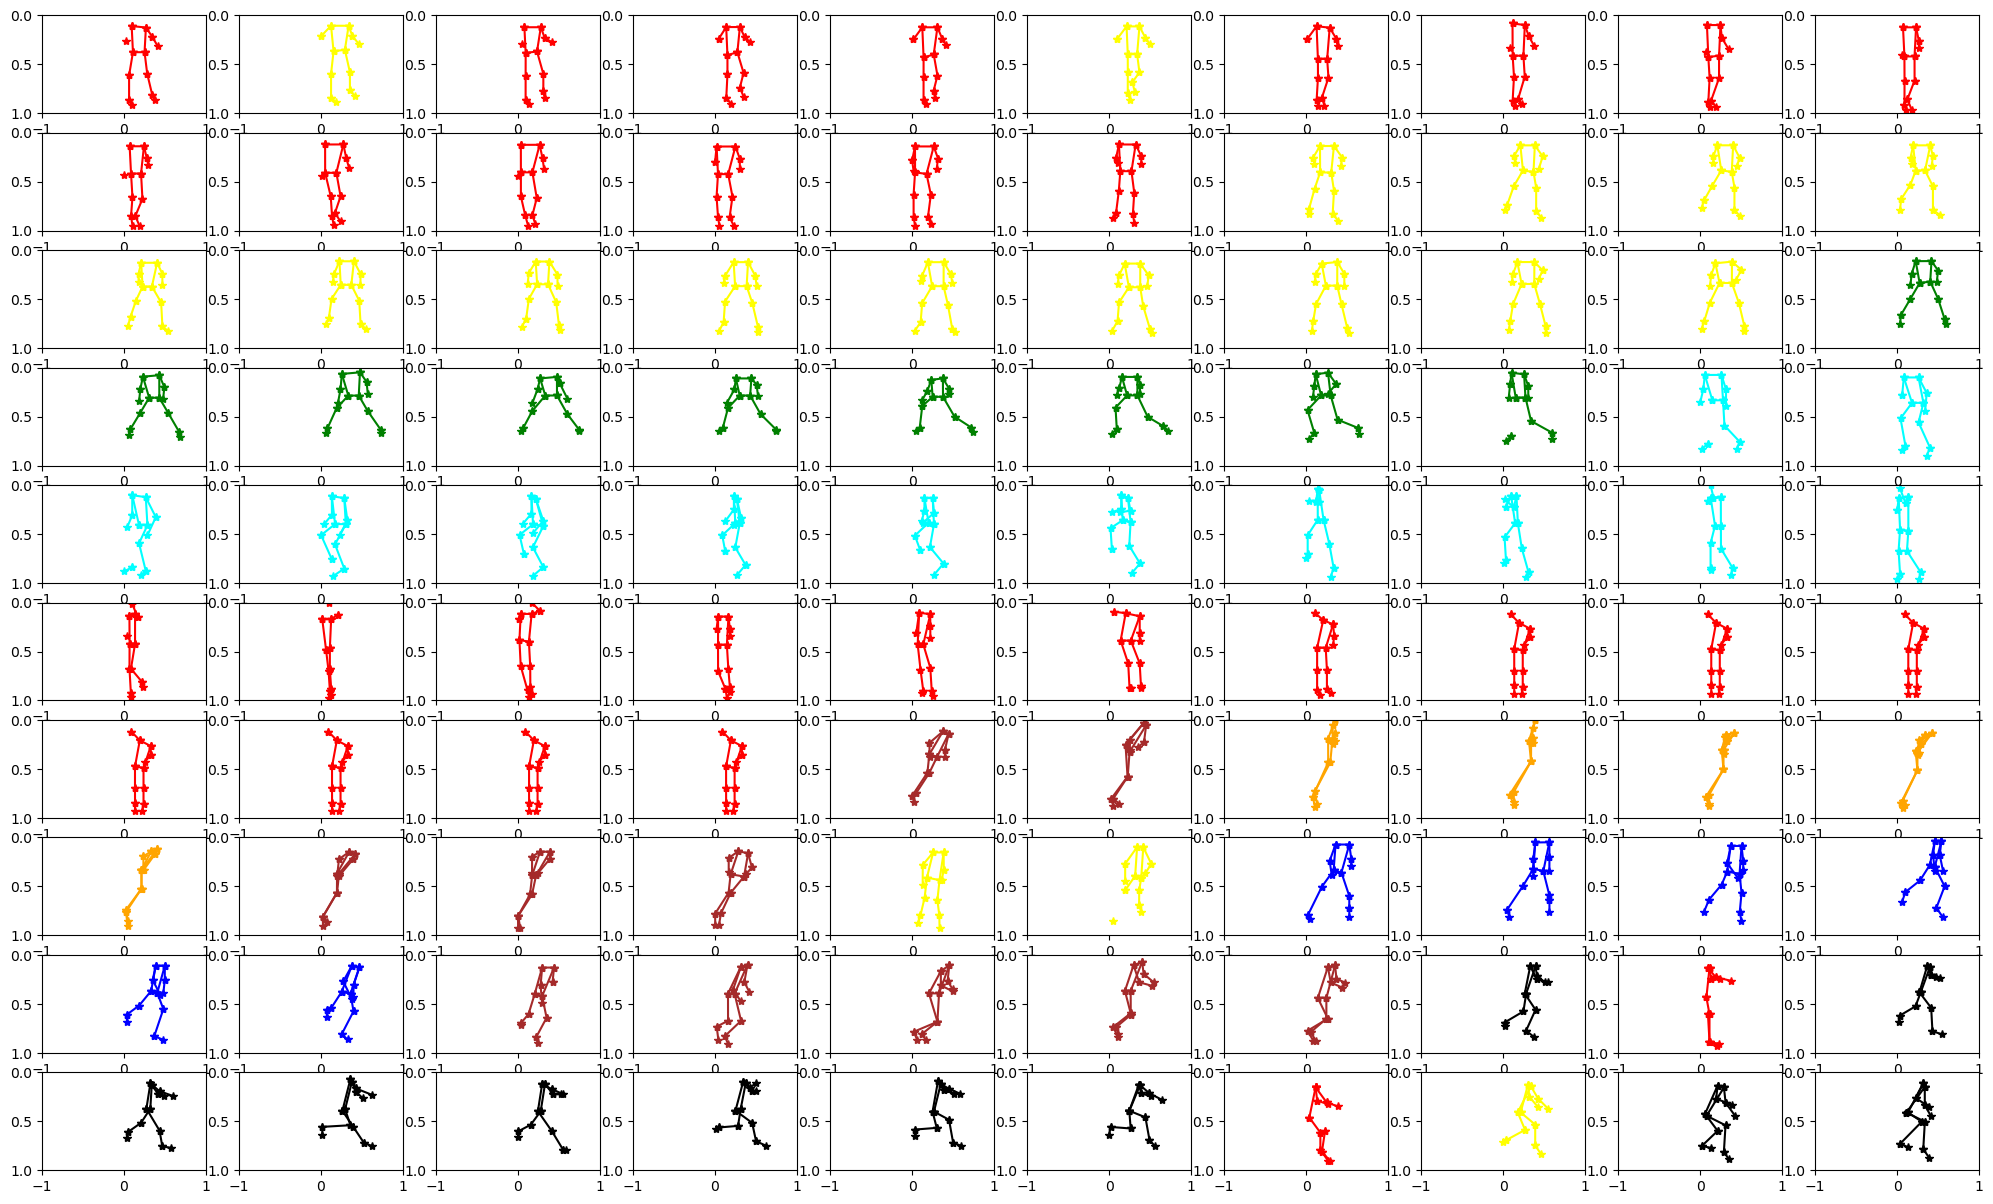

In [95]:
# You can now use 'cluster_labels' to see which cluster each frame belongs to
cluster_labels = kmeans.labels_
# 'centroids' contains the coordinates of the cluster centers
centroids = kmeans.cluster_centers_

colors = {0: 'red', 1: 'blue', 2: 'green', 3: "orange", 4: "black", 5: "brown", 6: "yellow", 7: "cyan"}  # Map cluster labels to colors
plt.figure(figsize=(25,15))
for i in range(len(sequence)):
    plt.subplot(10, 10, i + 1)
    plot_single_pose(sequence[i], c=colors[cluster_labels[i]], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)


---
**Task 5 (easy): Cluster characteristics💡**
1. Run the cell below to extract and plot the cluster centers.

2. Visually inspect the results and identify the characteristics of the poses in each cluster: 
    - What distinguishes the clusters?
    - What do the cluster centers represent?
    - What do the clusters reveal about movements?


3. Reason about the choice of 3 clusters and the effect on the result.

4. Change the random state and fit the model again. Explain whether you obtain different groupings and why? 



---

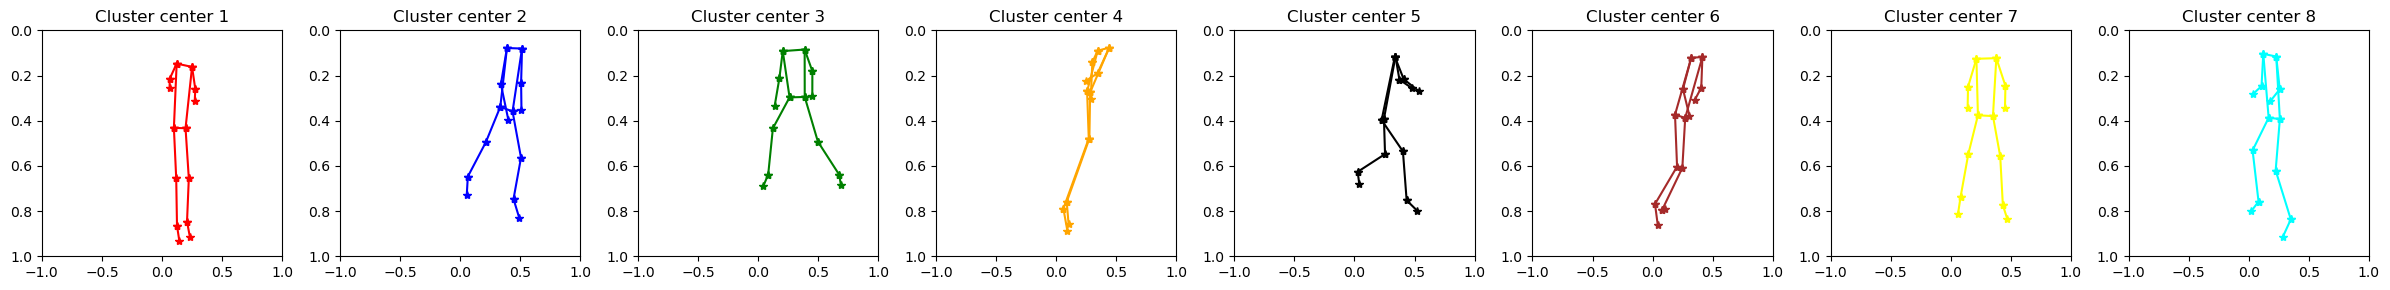

In [96]:
num_centroids = len(centroids)
# Set up subplots
fig, axes = plt.subplots(1, num_centroids, figsize=(num_centroids * 3, 3))

# Assuming you have a function plot_single_pose defined
for i in range(len(centroids)):
    plt.subplot(1, len(centroids), i+1)
    plt.title(f'Cluster center {i+1}')
    plot_single_pose(centroids[i], c=colors[i], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)

plt.tight_layout()
plt.show()


## Task 5 reflection

**Distinguishing Features of Clusters**  

* The first cluster is centered around a standing up figure with spread legs.

* The second is a pose where both arms are on the right side of the body because they are standing sideways, and with one leg in front of the other.

* The green cluster has poses where the arms and legs are closer to the body in a more 'tight' pose.

**Meaning of Cluster Centers**  

The cluster centers in K-means represent the average of all poses assigned to that cluster, essentially acting as a "typical" pose for each group. 

**Movement Insights from Clustering**  

The first and third clusters are more still standing while the second cluster seems to be moving to the right.

**Effect of Choosing 3 Clusters**  

Having k clusters, mean we can capture the essence of 3 groups. This might not be sufficient, if we for example think that there are at least 5 types of poses. But having too high k, means that we will split similar poses into different groups, which is also undesirable. That is why it is important to get the correct amount of k, for example through the elbow method.

**Effect of Changing the Random State**  

Changing the random state in K-means affects the initial centroid placement, which may result in slightly different groupings.



---
**Task 6 (medium): Elbow Method👩‍💻💡**
This task uses the Elbow Method to choose the number of clusters `k`
. The cell below:
- Applies k-means clustering to the sequence using each `k`
 in `k_range`
.
- Extracts the within-cluster sum of squares using [`kmeans.intertia_`
](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html)
 and stores it in a list.
- Plots the within-cluster sum of squares as a function of the number of clusters (elbow curve as displayed below) 

1. Visually determine the optimal number of clusters.

2. Calculate the rate of change for the elbow curve and plot its absolute value. Use the curve to determine the optimal `k`
.

3. Revisit and run the previous tasks ([Task 3](#loading), [Task 4](#loading2) and [Task 5](#loading02) ) with the optimal number of clusters. 

4. How does the elbow method influence the results in the previous tasks?



---

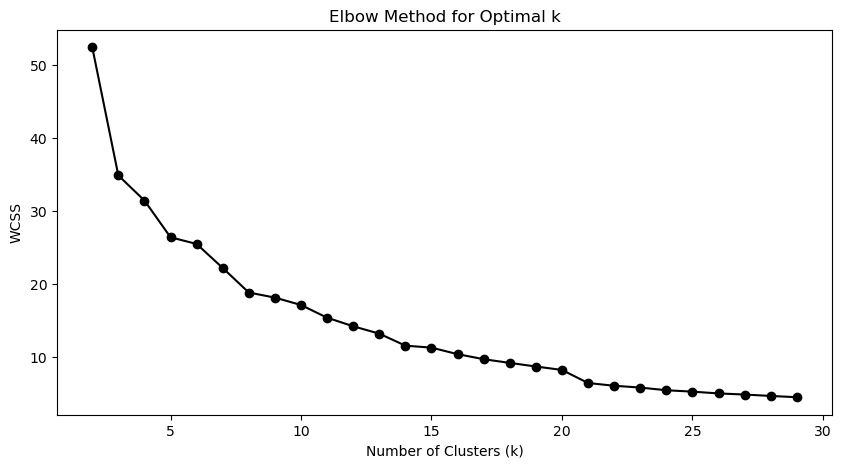

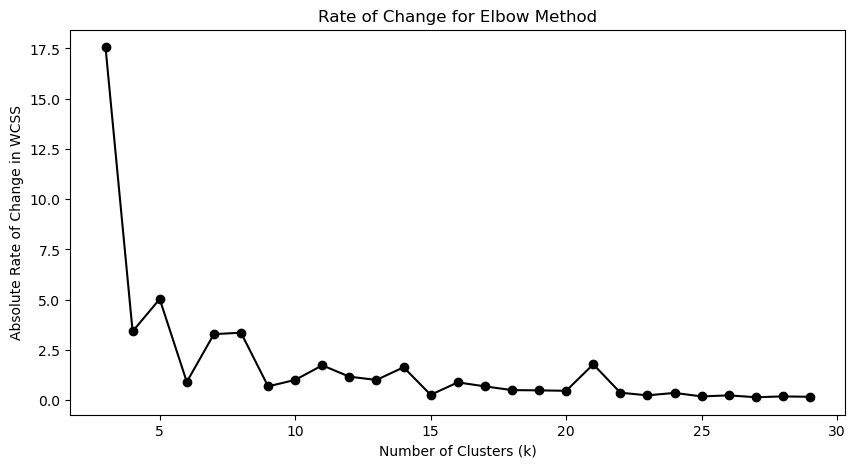

In [97]:
# Find the optimal k using the elbow method
k_range = range(2, 30) # values for the number of clusters `k`
inertia = [] #WCSS for each k (within-cluster sum of squares)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sequence)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

#2 Rate of change
# Calculate rate of change
rate_of_change = [abs(inertia[i] - inertia[i - 1]) for i in range(1, len(inertia))]

# Plot the rate of change
plt.figure(figsize=(10, 5))
plt.plot(k_range[1:], rate_of_change, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Absolute Rate of Change in WCSS')
plt.title('Rate of Change for Elbow Method')
plt.show()


## Task 6 reflection

**Reflection for Task 6**

**Optimal Number of Clusters from Elbow Curve**  
Visually, the "elbow point" in the curve is where the within-cluster sum of squares (WCSS) starts to decrease more slowly. 
This happens at k = 8

**Rate of Change in Elbow Curve**  
The rate of change plot shows the absolute difference in WCSS for successive `k` values. This plot helps confirm the elbow visually, where the rate of change decreases significantly, where we see that at k=8, is the last time we get a great decrease in WCSS.

**Influence on Previous Tasks**  
Using a higher k, means we are able to capture more distinct pose groupings, such as "sitting, running, standing, shifting..."

**Benefits of the Elbow Method**  
The elbow method provides a structured approach for selecting `k`, preventing over-clustering or under-clustering. It is especially useful in cases where domain knowledge is limited and empirical evidence is needed to guide cluster selection.


## Mean-shift Clustering
This exercise is about applying mean-shift clustering to the sequence of human poses. 

---
**Task 7 (easy): Fitting the mean-shift algorithm👩‍💻**
1. Run the cell below to:    - create an instance of the `MeanShift()`
 class with a bandwith of 0.629 
    - cluster the pose sequence.




---

In [98]:
# Perform Mean Shift clustering
mean_shift = MeanShift(bandwidth=0.829)
mean_shift.fit(sequence)

MeanShift(bandwidth=0.829)


---
**Task 8 (easy): Visualizing clusters👩‍💻**
1. Extract the cluster labels for each pose in the sequence. Use the `labels_`
 attribute as described in the [documentation on mean-shift clustering.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)

2. Visualize the pose sequence, assigning a distinct color to each pose based on its cluster.
3. Extract and plot the cluster centers using the `cluster_centers_`
 attribute.


---

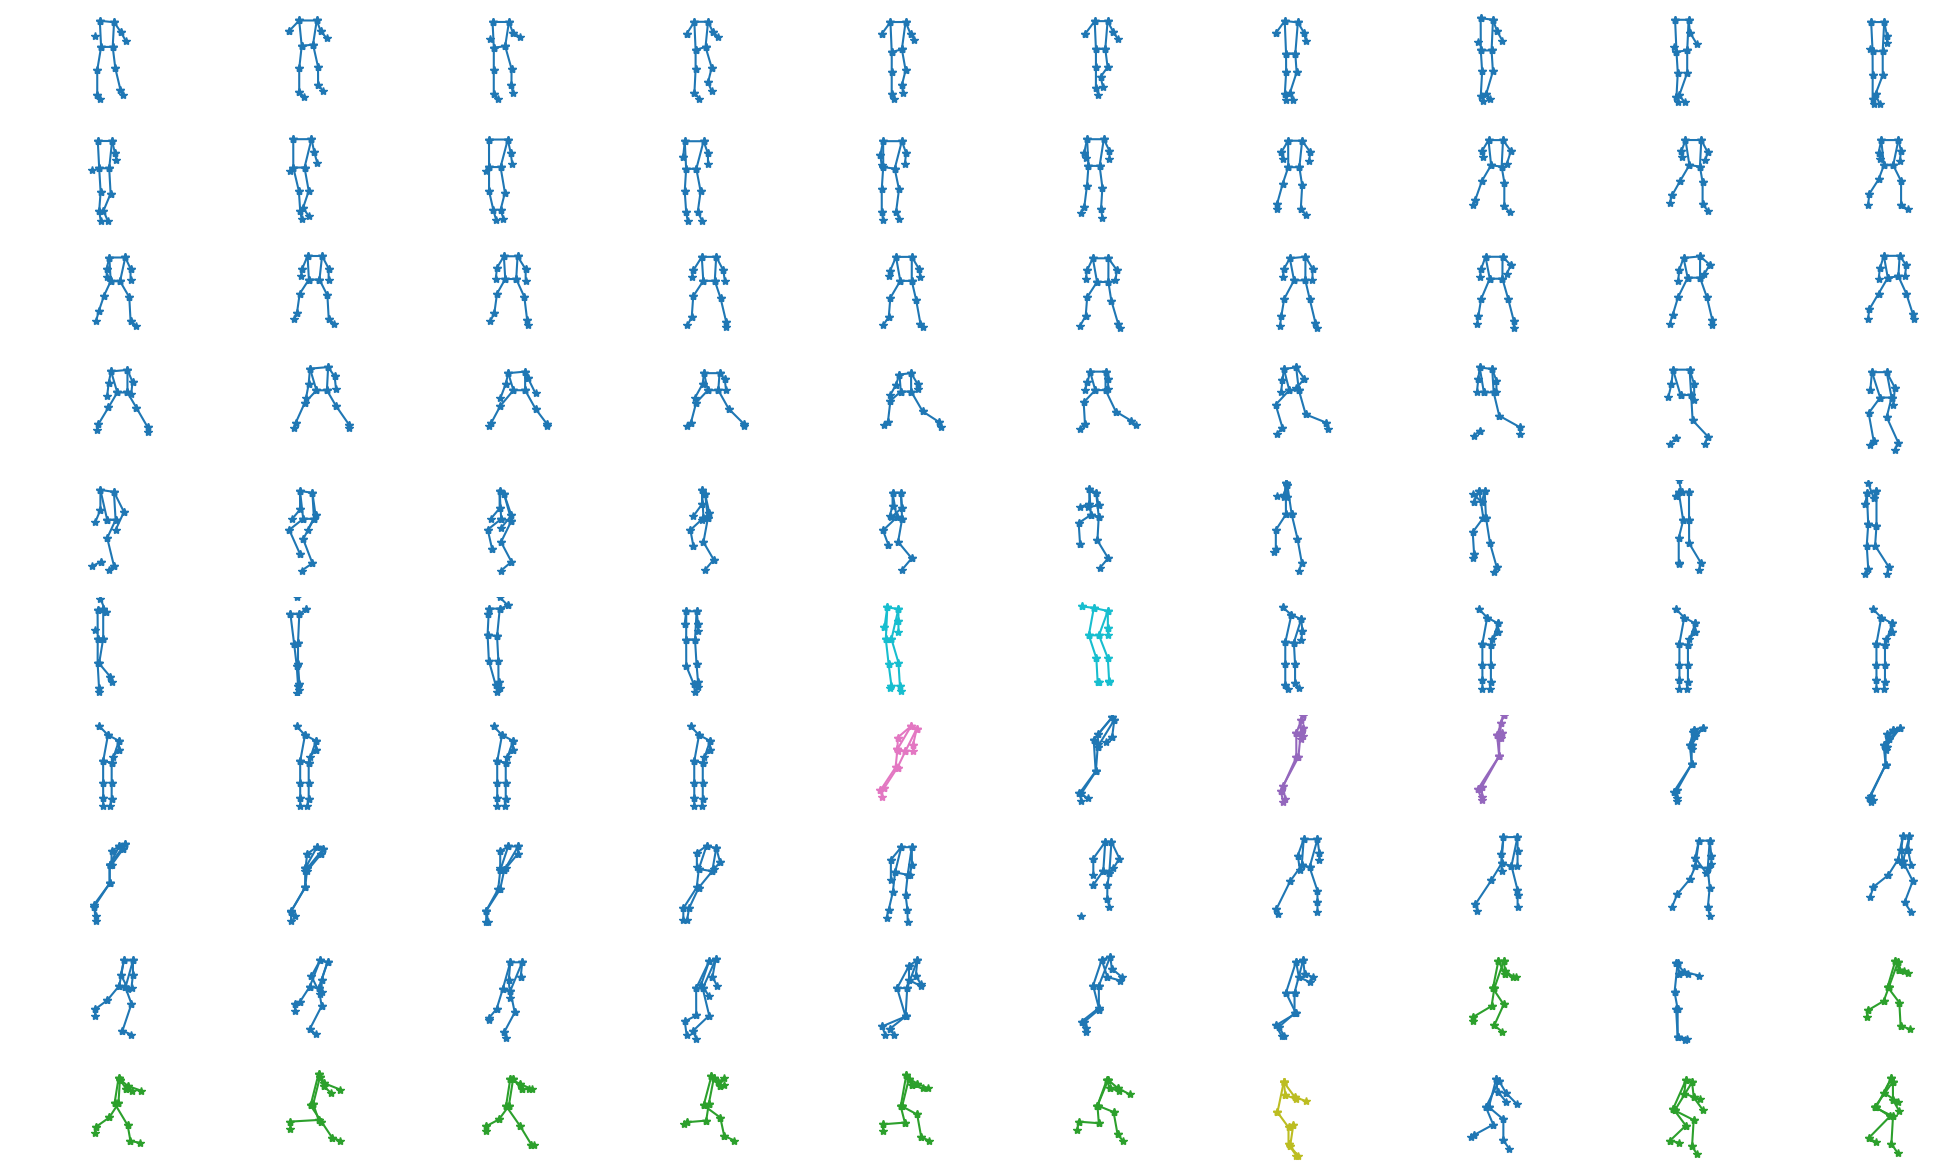

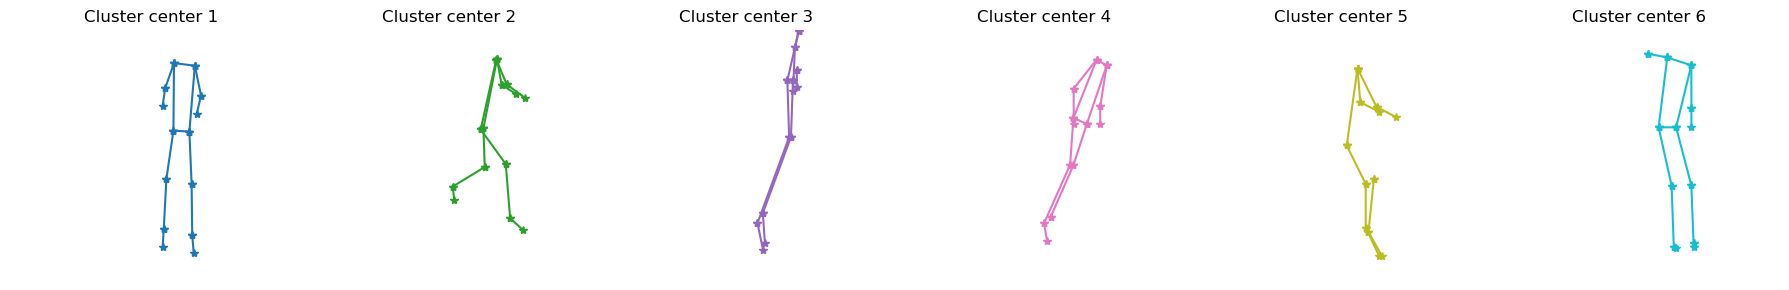

In [99]:
# Step 1: Extract cluster labels
cluster_labels = mean_shift.labels_
centroids = mean_shift.cluster_centers_

# Step 2: Define a color map for clusters
num_clusters = len(set(cluster_labels))
colors = plt.cm.get_cmap("tab10", num_clusters)

# Step 3: Visualize each pose with color based on cluster label
plt.figure(figsize=(25, 15))
for i in range(len(sequence)):
    plt.subplot(10, 10, i + 1)
    plot_single_pose(sequence[i], c=colors(cluster_labels[i]), head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)
    plt.axis('off')

plt.show()

# Step 4: Plot the cluster centers
fig, axes = plt.subplots(1, num_clusters, figsize=(num_clusters * 3, 3))

for i, center in enumerate(centroids):
    plt.subplot(1, num_clusters, i + 1)
    plt.title(f'Cluster center {i+1}')
    plot_single_pose(center, c=colors(i), head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)
    plt.axis('off')

plt.tight_layout()
plt.show()



---
**Task 9 (easy): Reflection and the bandwith parameter👩‍💻💡**
1. Visually examine the plots. What are the characteristics of the poses belonging to each cluster?
2. What effect does decreasing and increasing the bandwidth parameter by 0.2 (0.829 / 0.429) have and why?


**Info**
You might encounter longer run times for lower bandwith values.


---

## Task 9 reflection

**Effect of Adjusting the Bandwidth Parameter**

* Increasing bandwidth: Each point considers more points around it. This typically means that more points will find the "mode" of the same place, thus decreasing the amount of clusters.
* Decreasing bandwidth: Each point now considers less points around it. This typically means that more clusters will be made, as fewer points will be grouped together during the algorithm,

This sensitivity to bandwidth highlights the importance of tuning this parameter based on the desired clustering granularity. Finding a balance between capturing broad patterns and preserving fine details is key for effective clustering in pose analysis.

## Agglomerative Clustering
This exercise is about applying hierarchical clustering to the human poses dataset.

---
**Task 10 (easy): Dendrograms👩‍💻💡**
1. Run the cell below to generate a dendrogram. 
2. How many clusters would result from setting the distance threshold to: 0.5, 1.5, 3.0, 4?
3. What types of relationships can agglomerative clustering reveal that non-hierarchical methods might miss?


---

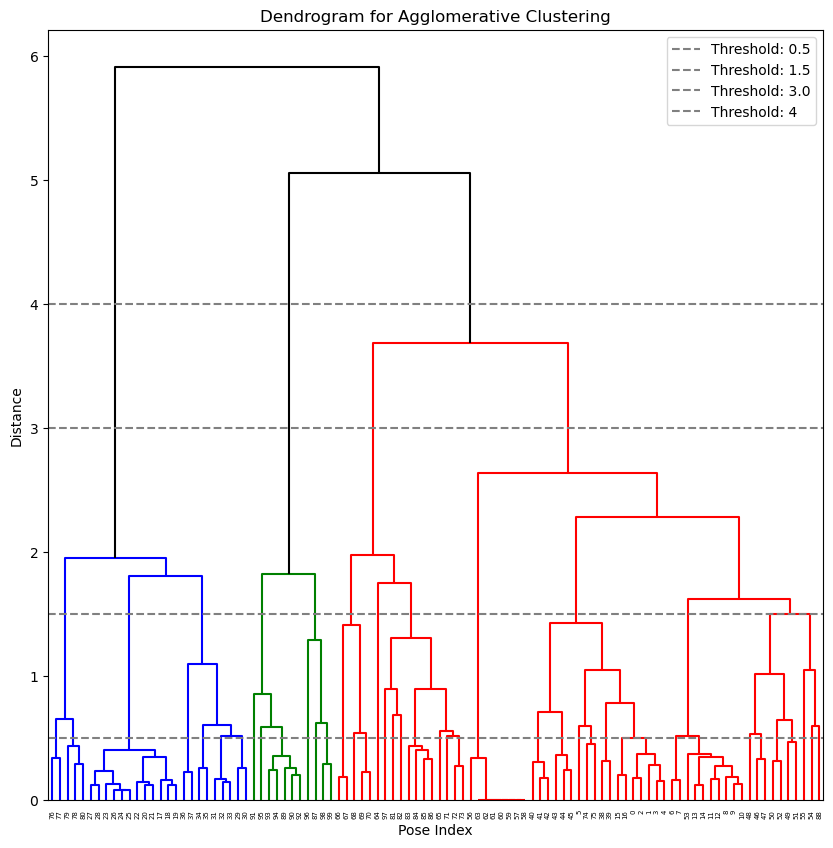

In [103]:
#1. Generating dendrogram
colors = {0: 'black', 1: 'blue', 2: 'green', 3: 'red'}
sns.set_palette([colors[i] for i in range(len(colors))])
shc.set_link_color_palette(None)
plt.figure(figsize=(10,10))
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Pose Index')
plt.ylabel('Distance')
linkage_matrix = shc.linkage(sequence, method ='ward', metric="euclidean")
Dendrogram = shc.dendrogram(linkage_matrix)

#2. horizontal lines for the distance thresholds
thresholds = [0.5, 1.5, 3.0, 4]
for threshold in thresholds:
    plt.axhline(y=threshold, color='gray', linestyle='--', label=f'Threshold: {threshold}')
plt.legend()
plt.show()

## Task 10 reflection

**Determine Number of Clusters for Given Distance Thresholds**
* Distance Threshold 0.5: Nearly every pose forms its own cluster, resulting in a large number of clusters.
* Distance Threshold 1.5: Still high amount of clusters, but not every pose is its own cluster.
* Distance Threshold 3.0: Around 4 clusters, therefore capturing broad poses, and not small details.
* Distance Threshold 4.0: Around 3 clusters, therefore not capturing most small details.

**What types of relationships can agglomerative clustering reveal that non-hierarchical methods might miss?**

* Hierarchical Relationships: Instead of getting the final clustering we can see a continuous graph (dendrogram). We can see where the "splits" happen. Some quickly get separated while others continue to stay together further down meaning they are more similar. Those who split early are very different.

* Flexibility in Cluster Selection: With a dendrogram, clusters can be formed at various thresholds without re-running the algorithm, allowing dynamic adjustments based on analysis needs.

This approach is particularly useful for datasets with gradual changes or natural hierarchies, offering insights that fixed-partition clustering might miss.



---
**Task 11 (easy): Fitting the agglomerative clustering algorithm👩‍💻**
The cell below creates an instance of the `AgglomerativeClustering()`
 class. The [documentation on agglomerative clustering is given here.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

1. Select the distance threshold that results in 3 clusters, then apply agglomerative clustering on the sequence. 
2. Extract the cluster labels for each pose in the sequence.
3. Visualize the pose sequence by assigning a distinct color to each pose based on its cluster.


---

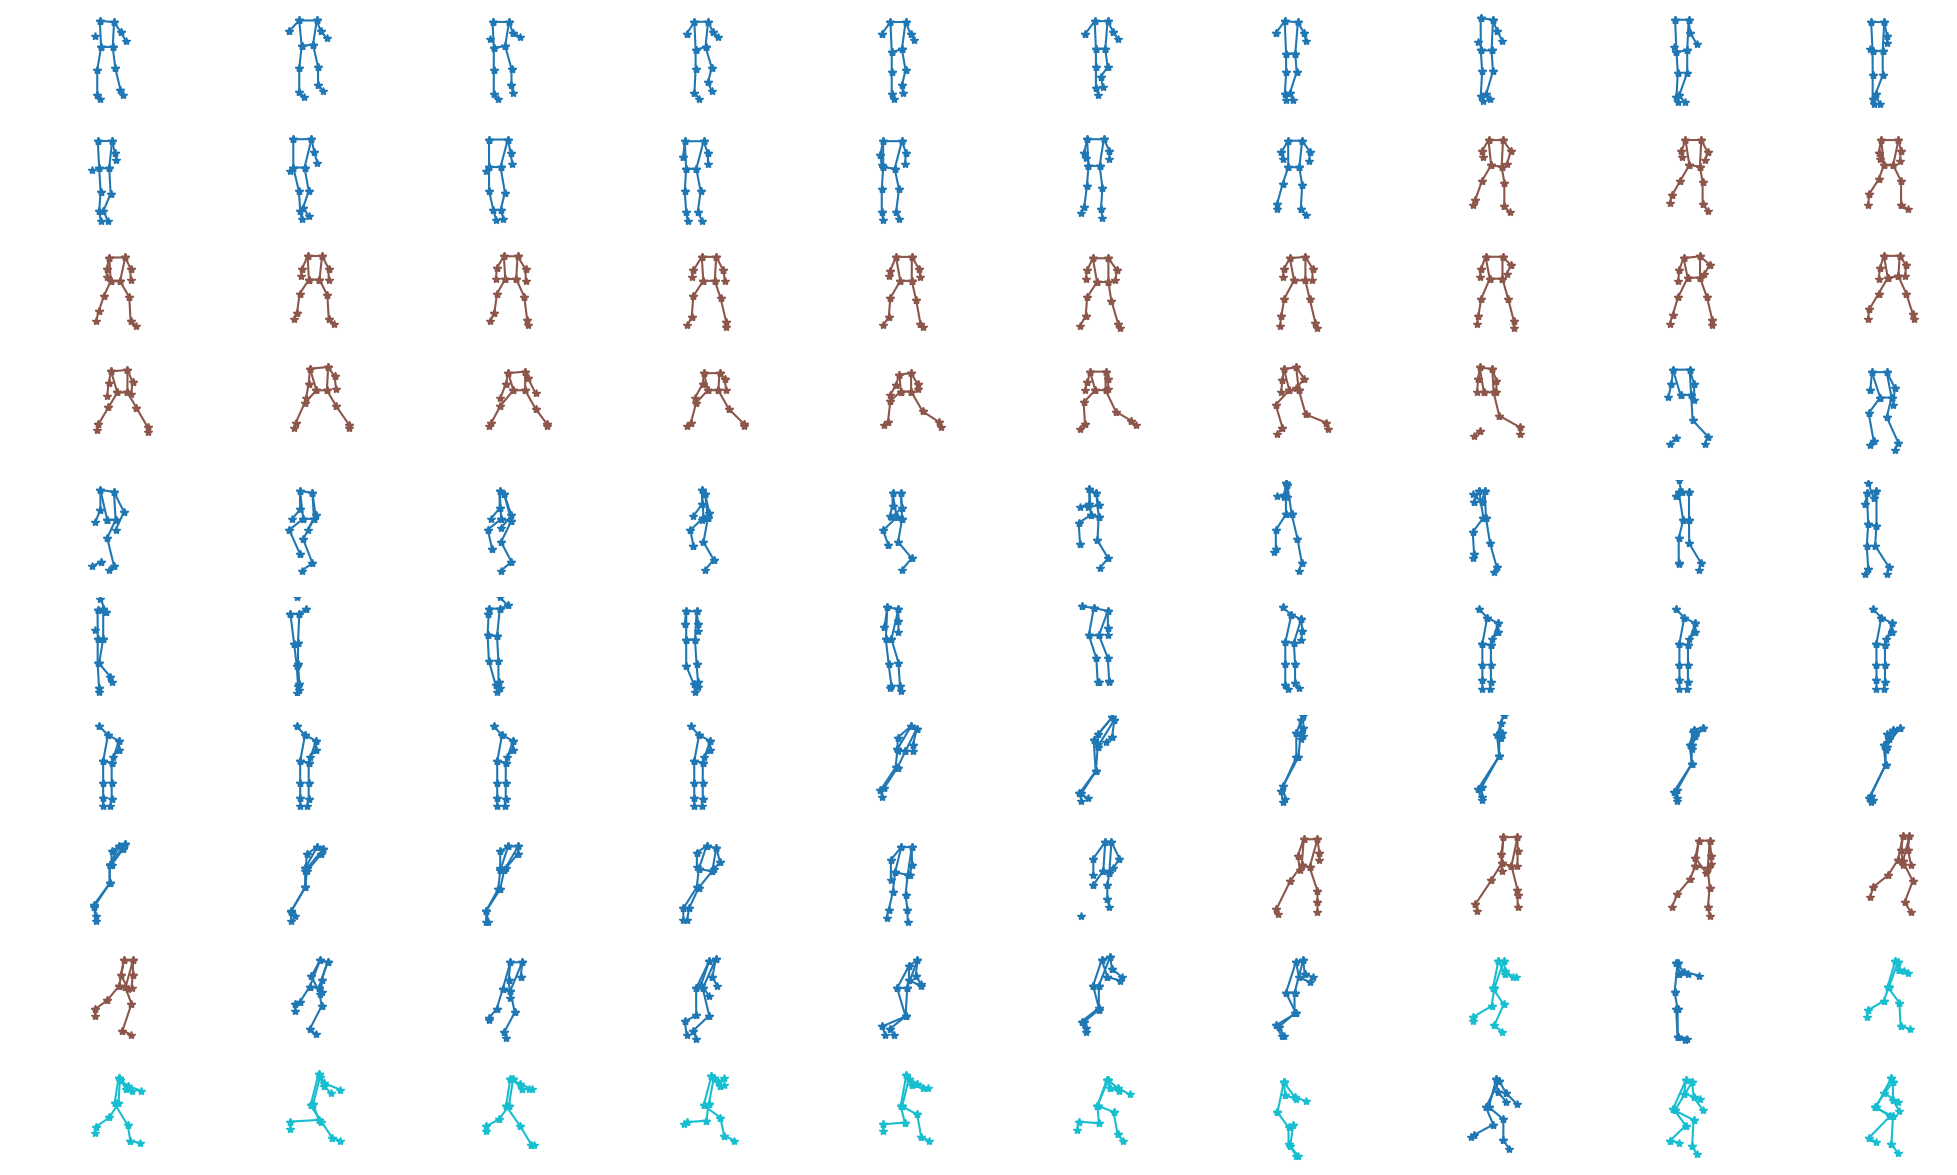

In [104]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 1: Create an instance of AgglomerativeClustering with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agg_clustering.fit(sequence)

# Step 2: Extract cluster labels for each pose
cluster_labels = agg_clustering.labels_

# Step 3: Define colors for each cluster
num_clusters = len(set(cluster_labels))
colors = plt.cm.get_cmap("tab10", num_clusters)

# Step 4: Visualize each pose in the sequence with a distinct color based on cluster
plt.figure(figsize=(25, 15))
for i in range(len(sequence)):
    plt.subplot(10, 10, i + 1)
    plot_single_pose(sequence[i], c=colors(cluster_labels[i]), head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)
    plt.axis('off')  # Hide axis for clarity

plt.show()



---
**Task 12 (easy): Agglomerative clustreing algorithm mean pose👩‍💻**
1. The `AgglomerativeClustering()`
 class does not have an attribute or a method for directly extracting cluster centers. Calculate the mean pose within each cluster for $k = 3$  and plot it.
2. Change the distance metric (try `l1`
 and `cosine`
) and repeat the previous two tasks ([Task 10](#loading10), [Task 11](#loading11) and [Task 12](#loading12).1). 
3. What differences do you observe, and can you explain why these differences occur? Does a different distance metric result in more meaningful clusters?


---

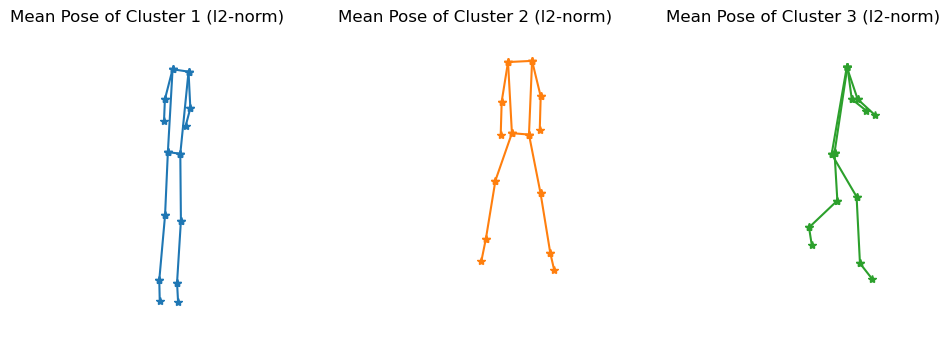

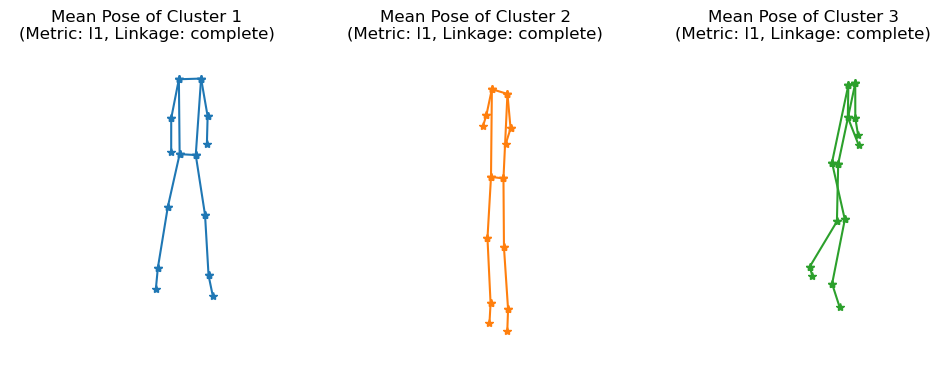

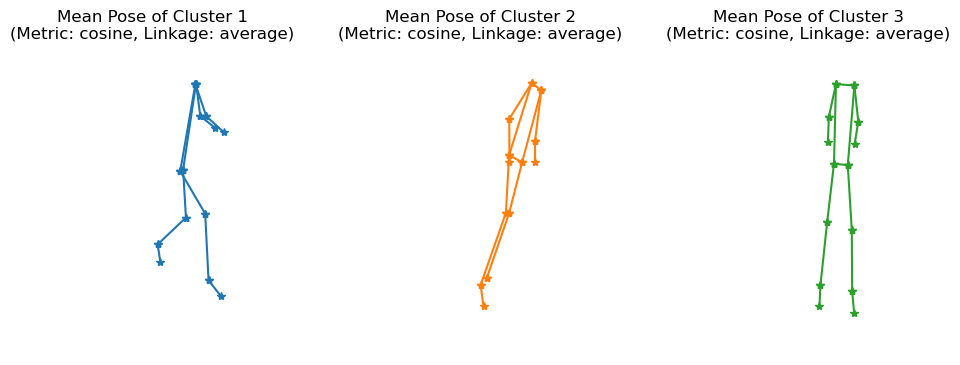

In [107]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

def calculate_mean_pose(sequence, labels, num_clusters):
    """Calculate the mean pose for each cluster."""
    mean_poses = []
    for cluster in range(num_clusters):
        cluster_poses = sequence[labels == cluster]
        mean_pose = np.mean(cluster_poses, axis=0)
        mean_poses.append(mean_pose)
    return mean_poses


# Step 1: Calculate mean poses for each cluster
mean_poses = calculate_mean_pose(sequence, cluster_labels, num_clusters=3)

# Plot mean poses
plt.figure(figsize=(12, 4))
for i, mean_pose in enumerate(mean_poses):
    plt.subplot(1, 3, i + 1)
    plt.title(f'Mean Pose of Cluster {i+1} (l2-norm)')
    plot_single_pose(mean_pose, c=plt.cm.tab10(i), head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)
    plt.axis('off')
plt.show()

# Step 2: Experiment with Different Distance Metrics (L1 and Cosine) and Compatible Linkage Methods
for metric, linkage in [('l1', 'complete'), ('cosine', 'average')]:
    agg_clustering = AgglomerativeClustering(n_clusters=3, metric=metric, linkage=linkage)
    labels = agg_clustering.fit_predict(sequence)
    
    # Calculate mean poses
    mean_poses = calculate_mean_pose(sequence, labels, num_clusters=3)

    # Plot mean poses for each cluster with the new metric and linkage
    plt.figure(figsize=(12, 4))
    for i, mean_pose in enumerate(mean_poses):
        plt.subplot(1, 3, i + 1)
        plt.title(f'Mean Pose of Cluster {i+1}\n(Metric: {metric}, Linkage: {linkage})')
        plot_single_pose(mean_pose, c=plt.cm.tab10(i), head=False)
        plt.ylim(1, 0)
        plt.xlim(-1, 1)
        plt.axis('off')
    plt.show()


## Task 12

**L2 vs L1-norm vs cosine, as distance metric**

- **L2 (Euclidean)**: The clusters tend to capture compact groups of poses with overall similarity in both position and shape. The mean poses appear balanced across all features, resulting in a general representation for each cluster.
- **L1 (Manhattan)**: The clusters are more sensitive to individual differences along specific dimensions (e.g., arm or leg positions). As a result, clusters may capture finer variations where small differences in position are emphasized, leading to mean poses that highlight subtle shifts.
- **Cosine**: The clustering focuses on the directionality of the poses rather than magnitude. This groups poses with similar orientations (e.g., arms or legs pointing in the same general direction), regardless of exact position.


**In short**: 

- `l2` focuses on overall Euclidean distance, grouping poses based on compactness. 
  
- `l1` focuses on dimension-wise absolute differences, which can create clusters based on specific body part positions. 
  
- `cosine` captures orientation similarity, grouping poses with similar angles rather than exact locations.




## Comparison

---
**Task 13 (medium): Compare and reflect on the methods👩‍💻💡**
1. Compare the clustered poses obtained with the different clustering methods (K-means, Mean-shift and Agglomerative clustering). What are the similarities and differences between the pose clusters across methods?
2. Why can clusters look similar across methods? 
3. What are the main reasons behind differences in the clusters?
4. The algorithms use different methods for determining the number of clusters. How do these differences impact the results for the pose data?


---

## task 13 reflection

### 1. Similarities and Differences Across Methods
- **K-means**: It optimizes clusters to minimize variance. It tends to produce evenly-sized clusters if the data has well-defined, circular clusters.
- **Mean-shift**: Mean-shift clustering is flexible with the number of clusters, adapting based on density. It can form clusters of varying shapes and sizes, ideal for capturing nuances in dense and sparse regions of pose data.
- **Agglomerative Clustering**: Agglomerative clustering captures hierarchical relationships, which can reveal sub-clusters within larger clusters. It is less strict about cluster shapes and is sensitive to the linkage method used. Example we can have books, and a sub-cluster could be childrens books, and subclusters could be paint-by-numbers and Peterpan.

**Observed Similarities**:  
Across all methods, some poses consistently cluster together. These likely represent highly similar poses that each method recognizes due to their strong intra-cluster similarity.

**Observed Differences**:  
With three clusters the results from each model were quite similar. The main difference was the parameters (k for k-means, bandwidth for mean-shift and threshold for agglomerative) and how they were determined. 

### 2. Why Clusters Can Look Similar Across Methods

Some poses are very similar in general, meaning regardless of which method you use they will most likely be grouped together.

### 3. Reasons Behind Differences in Clusters
- **Distance Metrics and Linkages**: Agglomerative clustering allows flexibility in distance metrics (e.g., `l1`, `cosine`), which may prioritize different pose characteristics, while K-means is strictly `euclidean`.
- **Cluster Shape and Density Sensitivity**: K-means favors spherical clusters, whereas mean-shift is sensitive to data density, creating clusters of varying shapes. Mean-shift might yield more clusters in dense areas.
- **Fixed vs. Variable Number of Clusters**: K-means requires a predefined `k`, while mean-shift determines the number based on density, and agglomerative clustering can vary based on a distance threshold. This impacts how these methods capture pose variations and distribute poses across clusters.

### 4. Impact of Cluster Number Determination on Pose Data
- **K-means**: Requires setting a fixed `k`, which might lead to under- or over-clustering if `k` doesn’t match the data's natural structure. The elbow method helps, but K-means may still miss finer details or merge distinct poses if clusters are large.
- **Mean-shift**: Adapts the number of clusters based on data density, which can reveal more nuanced clusters, especially in dense regions of poses. However, the bandwidth parameter significantly affects the results, and tuning it can be challenging.
- **Agglomerative Clustering**: The dendrogram allows flexible cluster selection by adjusting the distance threshold, which can help reveal hierarchical structure in the pose data. It’s beneficial for understanding natural transitions between poses but can be sensitive to the linkage method.

### In short
- **K-means** is suitable for evenly-sized clusters in well-separated data.
- **Mean-shift** excels with variable densities and adaptive cluster numbers.
- **Agglomerative Clustering** is ideal for hierarchical structures, allowing insights into data relationships at different levels of granularity.

